# **Data Exploration**

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load dataset Iris dari sklearn
IRIS = load_iris()
df = pd.DataFrame(data=IRIS.data, columns=IRIS.feature_names)

# Tambahkan kolom ID species (1,2,3) dan nama species
df['species'] = IRIS.target + 1
df['species_name'] = df['species'].map({1:'setosa', 2:'versicolor', 3:'virginica'})

# Tambahkan nomor baris mulai dari 1
df.insert(0, 'No', range(1, len(df)+1))

## **1. Statistik Deskriptif**

Statistik deskriptif ini menampilkan nilai rata-rata, standar deviasi, min, max, dan kuartil untuk semua fitur numerik pada dataset Iris.

In [7]:
print("Statistik Deskriptif Semua Fitur Numerik:")
display(df.describe().round(1))

Statistik Deskriptif Semua Fitur Numerik:


,No,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.0,150.0,150.0,150.0,150.0,150.0
mean,75.5,5.8,3.1,3.8,1.2,2.0
std,43.4,0.8,0.4,1.8,0.8,0.8
min,1.0,4.3,2.0,1.0,0.1,1.0
25%,38.2,5.1,2.8,1.6,0.3,1.0
50%,75.5,5.8,3.0,4.4,1.3,2.0
75%,112.8,6.4,3.3,5.1,1.8,3.0
max,150.0,7.9,4.4,6.9,2.5,3.0


## **2. Distribusi Tiap Fitur**

Berikut adalah histogram untuk masing-masing fitur numerik. KDE digunakan untuk melihat distribusi kemungkinan data secara lebih smooth.


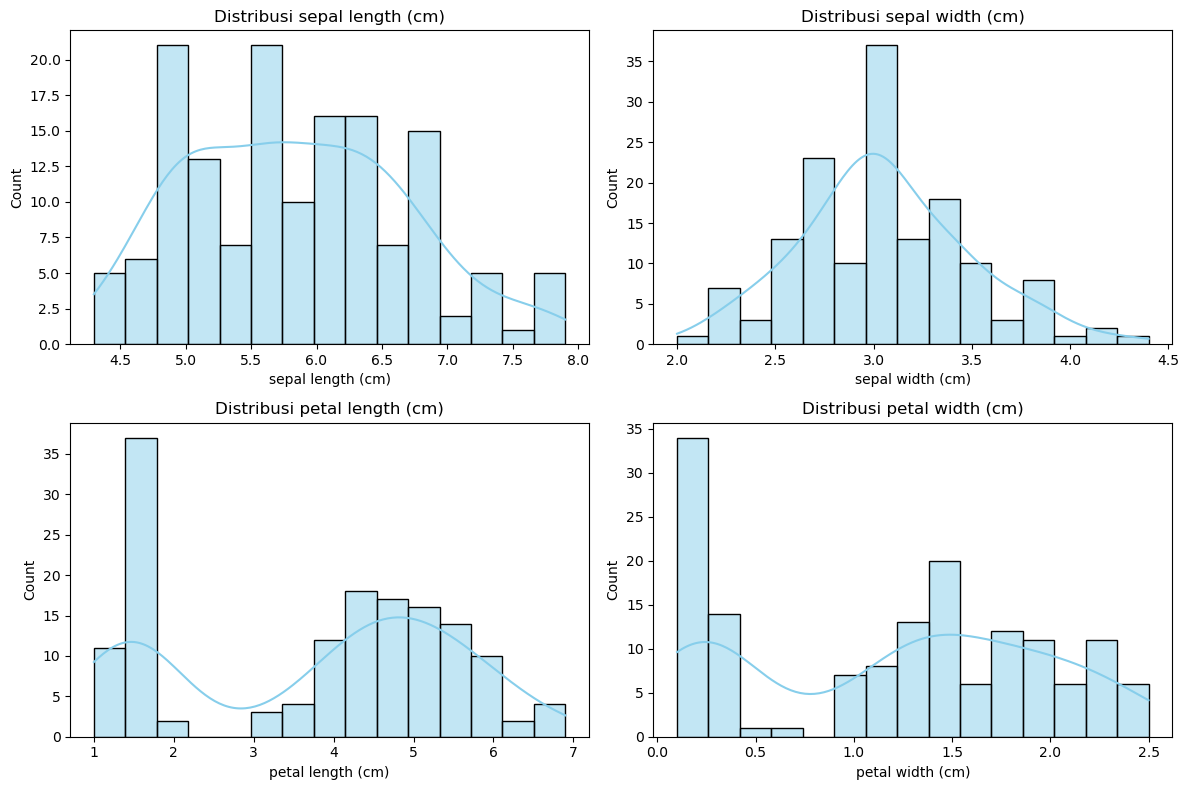

In [8]:
numeric_cols = IRIS.feature_names  # ['sepal length (cm)', 'sepal width (cm)', ...]

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

## **3. Korelasi Antar Fitur**



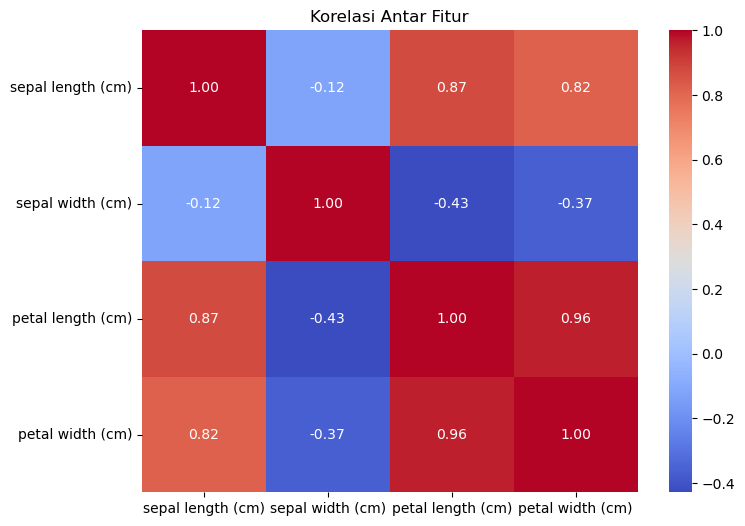

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Fitur")
plt.show()

## **4. Scatterplot Petal**

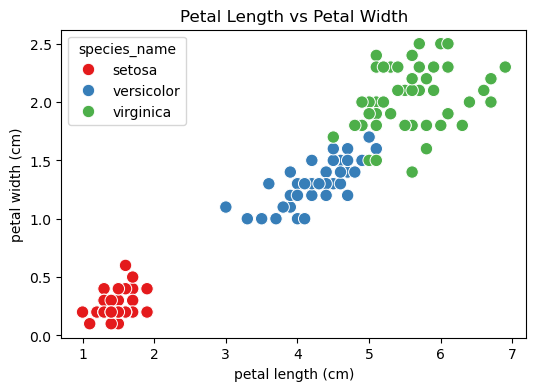

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', 
                hue='species_name', data=df, palette='Set1', s=80)
plt.title("Petal Length vs Petal Width")
plt.show()

## **5. Scatterplot Sepal**

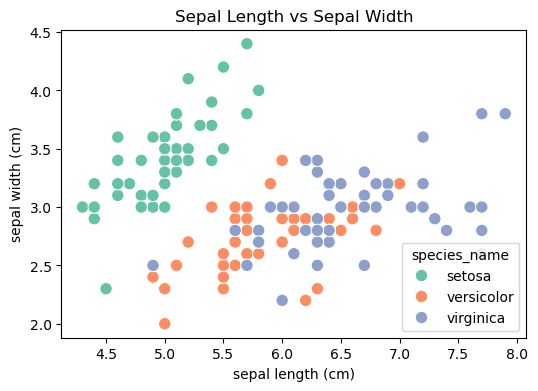

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='species_name', data=df, palette='Set2', s=80)
plt.title("Sepal Length vs Sepal Width")
plt.show()

## **6. Countplot Jumlah Tiap Species**

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_7116\421743302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species_name', data=df, palette='pastel')


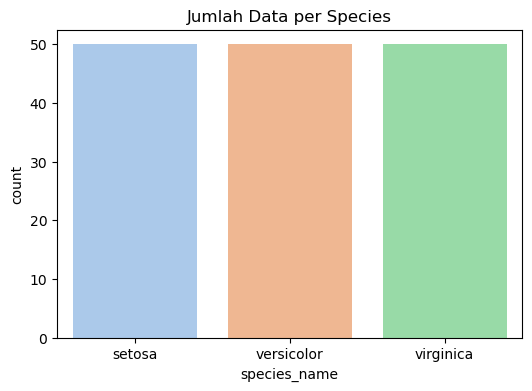

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='species_name', data=df, palette='pastel')
plt.title("Jumlah Data per Species")
plt.show()

## **7. Pairplot Semua Fitur**

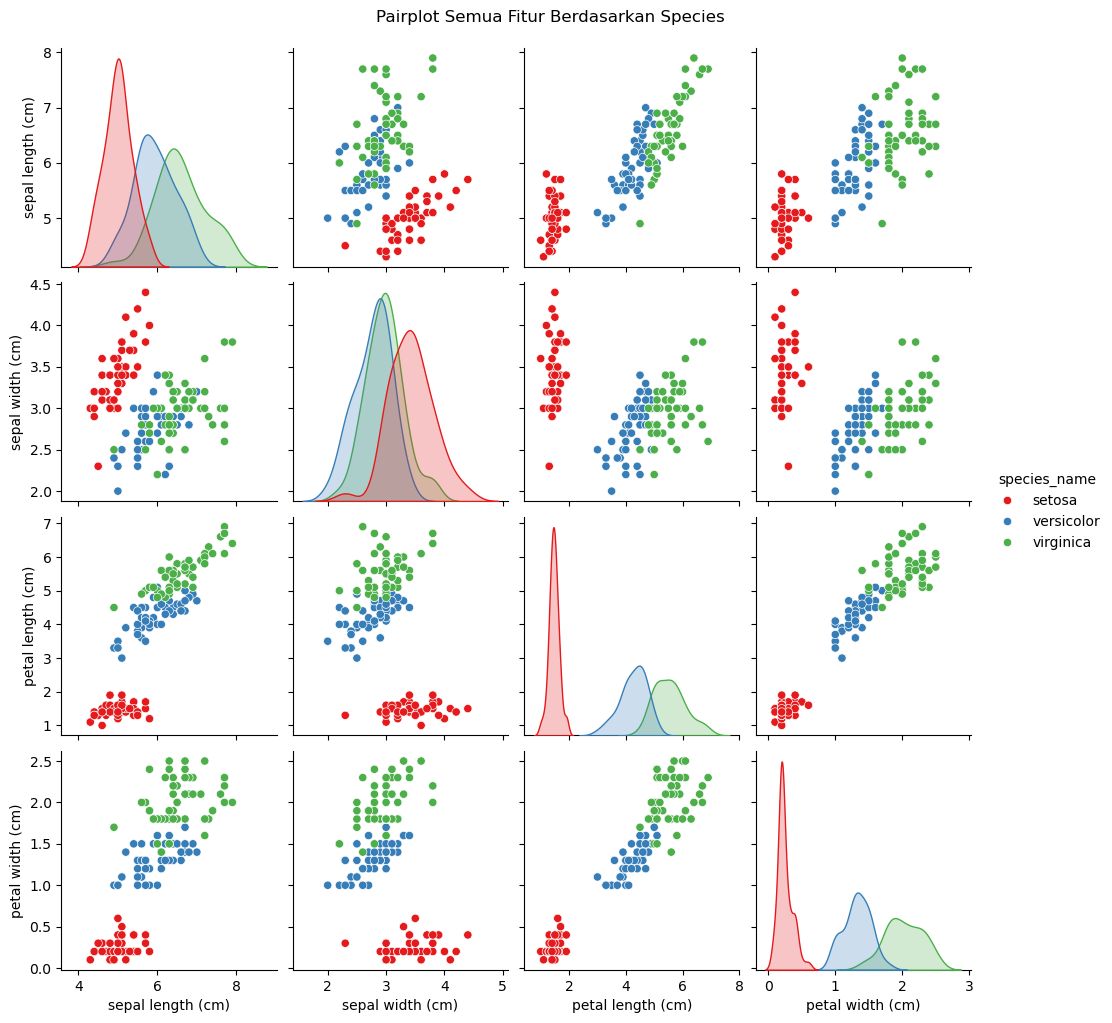

In [14]:
sns.pairplot(df, vars=numeric_cols, hue='species_name', palette='Set1')
plt.suptitle("Pairplot Semua Fitur Berdasarkan Species", y=1.02)
plt.show()

## **8. Analisis Per Spesies**

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_7116\1706288467.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")
C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_7116\1706288467.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")
C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_7116\1706288467.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")
C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_7116\1706288467.py:5: Fu

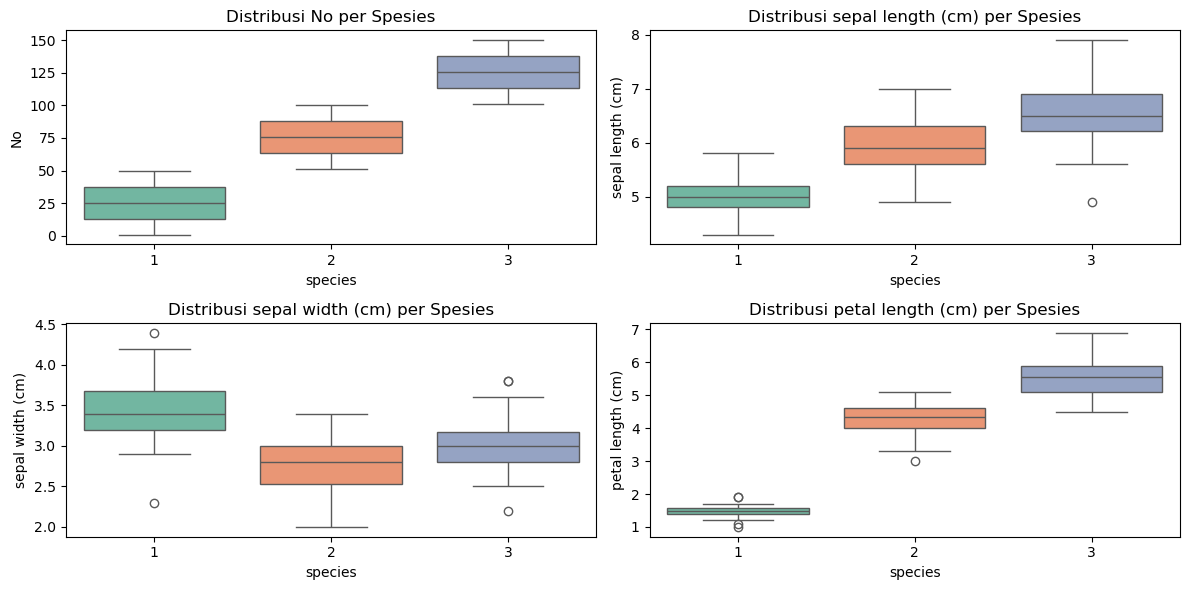

In [15]:
plt.figure(figsize=(12,6))
# Only plot the first 4 numeric columns
for i, col in enumerate(df.columns[:4], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x="species", y=col, data=df, palette="Set2")
    plt.title(f"Distribusi {col} per Spesies")
plt.tight_layout()
plt.show()

## **9. Deteksi Outlier**

In [16]:
num_cols = df.select_dtypes(include="number").columns

# Hitung IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Deteksi outlier
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | 
            (df[num_cols] > (Q3 + 1.5 * IQR)))

print("\n--- Jumlah Outlier per Kolom ---")
print(outliers.sum())

print("\n--- Persentase Outlier per Kolom ---")
print((outliers.sum() / len(df) * 100).round(2).astype(str) + " %")


--- Jumlah Outlier per Kolom ---
No                   0
sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

--- Persentase Outlier per Kolom ---
No                    0.0 %
sepal length (cm)     0.0 %
sepal width (cm)     2.67 %
petal length (cm)     0.0 %
petal width (cm)      0.0 %
species               0.0 %
dtype: object


In [17]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_data = df[(df[col] < lower) | (df[col] > upper)][[col, "species"]]
    
    print(f"\nOutlier pada {col}:")
    if not outlier_data.empty:
        print(outlier_data)
    else:
        print("Tidak ada outlier")


Outlier pada No:
Tidak ada outlier

Outlier pada sepal length (cm):
Tidak ada outlier

Outlier pada sepal width (cm):
    sepal width (cm)  species
15               4.4        1
32               4.1        1
33               4.2        1
60               2.0        2

Outlier pada petal length (cm):
Tidak ada outlier

Outlier pada petal width (cm):
Tidak ada outlier

Outlier pada species:
Tidak ada outlier



## **10. Kesimpulan**

1. Dataset terdiri dari 150 baris data dan 5 kolom (4 numerik, 1 kategorikal).
2. Tidak ada missing value pada dataset.
3. Sepal length dan petal length menunjukkan korelasi yang cukup tinggi (~0.87).
4. Distribusi fitur berbeda cukup signifikan antar spesies:
   - Setosa punya petal kecil (pendek & sempit).
   - Versicolor berada di tengah.
   - Virginica punya petal lebih panjang & lebar.
5. Ditemukan beberapa outlier pada sepal width.
6. Secara umum dataset bersih, terstruktur, dan siap dipakai untuk analisis lebih lanjut (klasifikasi).


```{tableofcontents}
```